In [15]:
import numpy
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
def euclidian_distance(p1, p2):
    return numpy.sqrt(numpy.sum((numpy.array(p1) - numpy.array(p2))**2))

def manhattan_distance(p1, p2):
    return numpy.sum(numpy.abs(numpy.array(p1) - numpy.array(p2)))

def minkowski_distance(p1, p2, p):
    return numpy.sum((numpy.array(p1) - numpy.array(p2))**p)**(1/p)



def knn_regression(trainX, trainY, testX, k, p):
    testY = []
    for i in range(len(testX)):
        distances = []
        for j in range(len(trainX)):
            dist = minkowski_distance(testX[i], trainX[j], p)
            distances.append((dist, trainY[j]))
        distances.sort(key=lambda x: x[0])
        k_nearest_values = [yi for _, yi in distances[:k]]
        testY.append(sum(k_nearest_values) / k)
    
    return testY

In [20]:
# ===== CONFIGURE HERE =====
csv_path = "../../Datasets/Student_Performance.csv"
test_size = 0.3  
random_state = 42  

# ===== LOAD DATASET =====
df = pd.read_csv(csv_path)
print(f"✅ Loaded dataset: {csv_path}")
print(f"   Rows: {len(df)}, Columns: {len(df.columns)}")
df = df.iloc[:, 1:]  

# ===== SPLIT DATASET =====
train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)

print(f"📊 Training set: {len(train_df)} rows")
print(f"📊 Test set: {len(test_df)} rows")

print("\nTraining set sample:")
print(train_df.head())
print("\nTest set sample:")
print(test_df.head())

# ===== Separate features and labels =====
X_train = train_df.iloc[:, :-1].values  
Y_train = train_df.iloc[:, -1].values   
X_test = test_df.iloc[:, :-1].values
Y_test = test_df.iloc[:, -1].values

# ===== Turning column = 'yes' or 'no' into numerical values =====
le = LabelEncoder()
X_train[:, 1] = le.fit_transform(X_train[:, 1])  
X_test[:, 1] = le.transform(X_test[:, 1])

# ===== PRINT FEATURES AND LABELS =====
print("\nX_train:")
print(X_train)

print("\nY_train:")
print(Y_train)

print("\nX_test:")
print(X_test)

print("\nY_test:")
print(Y_test)

# ===== SCALLING TO GET MEAN = 0 AND STANDARD DEVIATION = 1 =====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===== PRINT FEATURES AND LABELS =====
print("\nX_train:")
print(X_train)

print("\nY_train:")
print(Y_train)

print("\nX_test:")
print(X_test)

print("\nY_test:")
print(Y_test)

✅ Loaded dataset: ../../Datasets/Student_Performance.csv
   Rows: 10000, Columns: 6
📊 Training set: 7000 rows
📊 Test set: 3000 rows

Training set sample:
      Previous Scores Extracurricular Activities  Sleep Hours  \
9069               99                        Yes            6   
2603               90                        Yes            9   
7738               57                         No            6   
1579               92                        Yes            8   
5058               64                        Yes            8   

      Sample Question Papers Practiced  Performance Index  
9069                                 1               82.0  
2603                                 3               79.0  
7738                                 1               50.0  
1579                                 7               81.0  
5058                                 4               52.0  

Test set sample:
      Previous Scores Extracurricular Activities  Sleep Hours  \
6252        

In [21]:
melhor_k = 0
melhor_mse = float('inf')

for k in tqdm(range(1, 30), desc="Testing k values"):
    pred = knn_regression(X_train, Y_train, X_test, k, 2)
    mse = mean_squared_error(Y_test, pred)
    print(f"k={k}, MSE={mse:.4f}")

    if mse < melhor_mse:  
        melhor_mse = mse
        melhor_k = k
        melhor_pred = pred

print(f"✅ Best k: {melhor_k} with MSE: {melhor_mse:.4f}")

Testing k values:   3%|▎         | 1/29 [01:03<29:40, 63.60s/it]

k=1, MSE=114.8820


Testing k values:   7%|▋         | 2/29 [02:06<28:34, 63.48s/it]

k=2, MSE=84.4481


Testing k values:  10%|█         | 3/29 [03:10<27:32, 63.57s/it]

k=3, MSE=76.0807


Testing k values:  14%|█▍        | 4/29 [04:14<26:33, 63.73s/it]

k=4, MSE=70.4113


Testing k values:  17%|█▋        | 5/29 [05:18<25:29, 63.74s/it]

k=5, MSE=68.0165


Testing k values:  21%|██        | 6/29 [06:22<24:25, 63.74s/it]

k=6, MSE=66.4213


Testing k values:  24%|██▍       | 7/29 [07:25<23:22, 63.75s/it]

k=7, MSE=65.3366


Testing k values:  28%|██▊       | 8/29 [08:29<22:16, 63.64s/it]

k=8, MSE=64.3507


Testing k values:  31%|███       | 9/29 [09:33<21:14, 63.75s/it]

k=9, MSE=63.6653


Testing k values:  34%|███▍      | 10/29 [10:37<20:13, 63.86s/it]

k=10, MSE=62.8190


Testing k values:  38%|███▊      | 11/29 [11:41<19:11, 63.98s/it]

k=11, MSE=62.7095


Testing k values:  41%|████▏     | 12/29 [12:45<18:06, 63.93s/it]

k=12, MSE=62.4074


Testing k values:  45%|████▍     | 13/29 [13:49<17:05, 64.07s/it]

k=13, MSE=62.1521


Testing k values:  48%|████▊     | 14/29 [14:53<15:58, 63.90s/it]

k=14, MSE=62.0641


Testing k values:  52%|█████▏    | 15/29 [15:58<15:01, 64.39s/it]

k=15, MSE=62.1211


Testing k values:  55%|█████▌    | 16/29 [17:03<13:59, 64.56s/it]

k=16, MSE=61.5769


Testing k values:  59%|█████▊    | 17/29 [18:07<12:52, 64.36s/it]

k=17, MSE=61.4821


Testing k values:  62%|██████▏   | 18/29 [19:11<11:45, 64.12s/it]

k=18, MSE=61.3771


Testing k values:  66%|██████▌   | 19/29 [20:14<10:38, 63.89s/it]

k=19, MSE=60.9588


Testing k values:  69%|██████▉   | 20/29 [21:18<09:34, 63.83s/it]

k=20, MSE=60.9867


Testing k values:  72%|███████▏  | 21/29 [22:22<08:30, 63.85s/it]

k=21, MSE=60.8459


Testing k values:  76%|███████▌  | 22/29 [23:26<07:26, 63.82s/it]

k=22, MSE=60.6710


Testing k values:  79%|███████▉  | 23/29 [24:29<06:22, 63.82s/it]

k=23, MSE=60.7749


Testing k values:  83%|████████▎ | 24/29 [25:33<05:18, 63.62s/it]

k=24, MSE=60.8036


Testing k values:  86%|████████▌ | 25/29 [26:36<04:14, 63.51s/it]

k=25, MSE=60.7458


Testing k values:  90%|████████▉ | 26/29 [27:40<03:10, 63.66s/it]

k=26, MSE=60.7766


Testing k values:  93%|█████████▎| 27/29 [28:44<02:07, 63.81s/it]

k=27, MSE=60.8007


Testing k values:  97%|█████████▋| 28/29 [29:48<01:03, 63.78s/it]

k=28, MSE=60.7846


Testing k values: 100%|██████████| 29/29 [30:51<00:00, 63.84s/it]

k=29, MSE=60.7740
✅ Best k: 22 with MSE: 60.6710


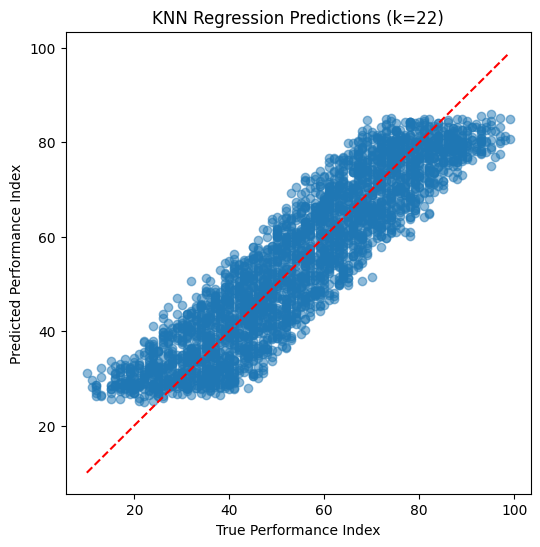

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, melhor_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("True Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title(f"KNN Regression Predictions (k={melhor_k})")
plt.show()